# Method3

This notebook generates the hourly number of arrivals using a Poisson distribution for each hour. We do using the example from Banks et al.

::: {.callout-tip collapse="true"}
## More detail on the example from Banks et al.

The table below is taken from Banks et al. and breaks an arrival process down into 60 minutes intervals.


| t(min) | Mean time between arrivals (min) | Arrival Rate $\lambda(t)$ (arrivals/min) |
|:------:|:--------------------------------:|:--------------------------------------:|
|    0   |                15                |                  1/15                  |
|   60   |                12                |                  1/12                  |
|   120  |                 7                |                   1/7                  |
|   180  |                 5                |                   1/5                  |
|   240  |                 8                |                   1/8                  |
|   300  |                10                |                  1/10                  |
|   360  |                15                |                  1/15                  |
|   420  |                20                |                  1/20                  |
|   480  |                20                |                  1/20                  |


> **Interpretation**: In the table above the fastest arrival rate is 1/5 customers per minute or 5 minutes between customer arrivals.

:::


## Imports

In [1]:
import warnings
# avoid pandas deprecation warning. 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sim_tools.datasets import load_banks_et_al_nspp
import sim_tools
sim_tools.__version__

'0.5.0'

## Arrival Profile Data

We will use the `arrival_rate` column as the parameter of the individual Poisson distributions.

In [3]:
banks_arrival_profile = load_banks_et_al_nspp()
banks_arrival_profile

,t,mean_iat,arrival_rate
0,0,15,0.066667
1,60,12,0.083333
2,120,7,0.142857
3,180,5,0.200000
4,240,8,0.125000
5,300,10,0.100000
6,360,15,0.066667
7,420,20,0.050000
8,480,20,0.050000


## Sampler

A class has been created to simplify the sampling.

In [4]:
class HourPoissonSampler:
    def __init__(self, arrival_profile, random_seed=None):
        self.arrival_profile = arrival_profile
        self.rng = np.random.default_rng(random_seed)

    def sample(self, hour, size=None):
        '''Sample the number of arrivals in a given hour

        Parameters:
        ---------
        hour: int
            Zero indexed hour

        size: int, optional (default=None)
            Number of samples to return. None returns 1.

        Returns:
        -------
        np.array or float
        
        '''
        rate = self.arrival_profile.iloc[hour]['arrival_rate']
        return self.rng.poisson(rate, size=size)
    

## Using the sampler

In [5]:
samples_per_hour = 100_000

# create the sampler and set seed
ph_sampler = HourPoissonSampler(banks_arrival_profile, random_seed=42)

# returns numpy array for hour 1
hr_sample = ph_sampler.sample(0, size=samples_per_hour)
hr_sample.shape

(100000,)

In [6]:
# first 10 results
hr_sample[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [7]:
# mean arrival rate as expected - its our rate parameter og 0.067 per hr.
hr_sample.mean()

0.06723

## Sampling experiment

In [8]:
ph_sampler = HourPoissonSampler(banks_arrival_profile, random_seed=42)

samples = []
for hr in range(len(banks_arrival_profile)):
    hr_sample = ph_sampler.sample(hr, size=samples_per_hour)
    samples.append(hr_sample)



## Plot results

The hour means are our theorectical arrival rates per hour - as expected.

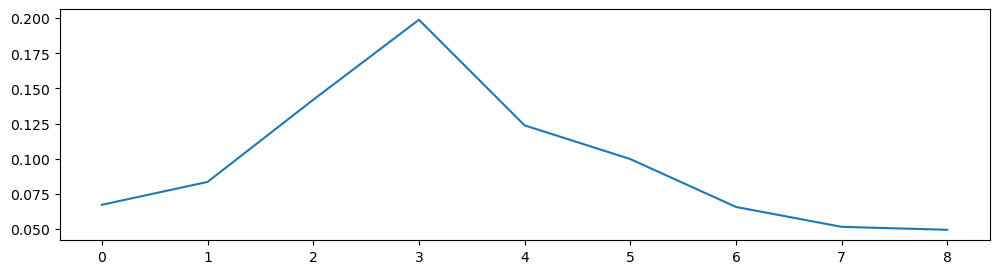

In [9]:
# get hour means
hour_means = np.asarray(samples).mean(axis=1)

# visualise
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

# plot in this case returns a 2D line plot object
_ = ax.plot(hour_means)

In [10]:
pd.DataFrame(hour_means).to_csv("./banks_method3.csv", index=False)